# Group M - Solar Potential ML
## Members:
### 21030062 - Eimantas Miliauskis
### - Harvey
### - Yasine

In [8]:
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, classification_report
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, precision_score, classification_report

In [9]:
read_full = pd.read_excel("solar-potential.xlsx")

KeyboardInterrupt: 

In [ ]:
print(read_full.head())
print(read_full.count())

   OBJECTID  Insolation     Area  Generation  CO2 Saving kg per year  \
0     10528   1027.9546  34.6873   3209.1230               1742.5538   
1     10555    973.5484  29.1889   2557.5083               1388.7271   
2     10557   1007.9615  24.1928   2194.6885               1191.7158   
3     10577    984.3519  55.2254   4892.5117               2656.6338   
4     10595   1022.1143  32.5077   2990.3904               1623.7820   

   Solar PV Capacity kWp         Suitability  SHAPE.STArea()  \
0                 4.9553  excellent suitable        93.73000   
1                 4.1698       well suitable        69.91125   
2                 3.4561  excellent suitable        91.94250   
3                 7.8893       well suitable        79.90375   
4                 4.6440  excellent suitable        63.07750   

   SHAPE.STLength()                                          geo_shape  \
0         46.953521  {"coordinates":[[[-2.5874139063286563,51.47972...   
1         41.581571  {"coordinates

In [ ]:
X_corr=read_full["geo_point_2d"].str.split(', ', expand = True)
y_corr = read_full["Generation"]/read_full["Area"]
print(X_corr)
# print(y_corr)
scaleX = StandardScaler().fit(X_corr)
# scaley = StandardScaler().fit(y_corr)
X_corr = scaleX.transform(X_corr)
# y_corr = scaley.transform(y_corr)
# print(X_corr)
X_corr_train, X_corr_test, y_corr_train, y_corr_test = train_test_split(X_corr,y_corr, test_size=0.19)
print(X_corr_test)


                         0                    1
0       51.479789394915414  -2.5873612480211072
1        51.47943580731375  -2.5902427777710884
2        51.48096825418921   -2.588538353721102
3       51.479505984165904   -2.588481244956915
4         51.4799082620456   -2.586075884271848
...                    ...                  ...
158143   51.48596806745893  -2.6134686522721027
158144   51.48641140220748  -2.6081751638178625
158145   51.48588361966243   -2.611055941491508
158146  51.486208218743656  -2.6116739193773073
158147  51.486524801230416  -2.6063219578587495

[158148 rows x 2 columns]
[[ 0.71440721  0.39069284]
 [ 1.13546759 -0.11749943]
 [-1.21584886  0.4264581 ]
 ...
 [-0.67761887 -0.37475939]
 [ 1.29584486 -0.0578863 ]
 [ 1.39423068 -1.92460081]]


In [ ]:
readfile = pd.read_excel("solar-potential.xlsx", usecols=["Insolation", "Generation","Area"], nrows=10000)
print(f"# num values:\n{readfile.isnull().sum()}\n")
readfile = readfile[readfile.Generation <= 7000] 

print(readfile.head())

X = readfile[["Insolation", "Area"]].copy()
y = readfile["Generation"].copy()
print(X.head(), end="\n\n")
print(y.head())
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.19)
min_max_scalar = preprocessing.MinMaxScaler()
X = min_max_scalar.fit_transform(X)
# y = min_max_scalar.fit_transform(y)

# num values:
Insolation    0
Area          0
Generation    0
dtype: int64

   Insolation     Area  Generation
0   1027.9546  34.6873   3209.1230
1    973.5484  29.1889   2557.5083
2   1007.9615  24.1928   2194.6885
3    984.3519  55.2254   4892.5117
4   1022.1143  32.5077   2990.3904
   Insolation     Area
0   1027.9546  34.6873
1    973.5484  29.1889
2   1007.9615  24.1928
3    984.3519  55.2254
4   1022.1143  32.5077

0    3209.1230
1    2557.5083
2    2194.6885
3    4892.5117
4    2990.3904
Name: Generation, dtype: float64


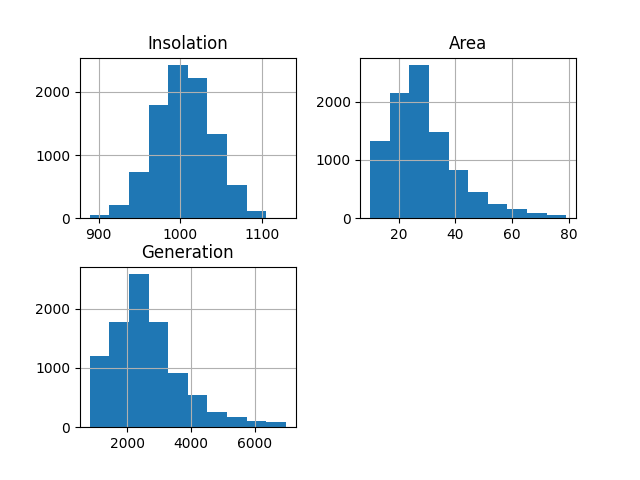

In [ ]:
readfile.hist()
plt.show()

In [ ]:
sns.boxplot(readfile["Generation"])

<AxesSubplot: >

In [ ]:
print(np.where(readfile["Generation"]>1000000))

(array([], dtype=int64),)


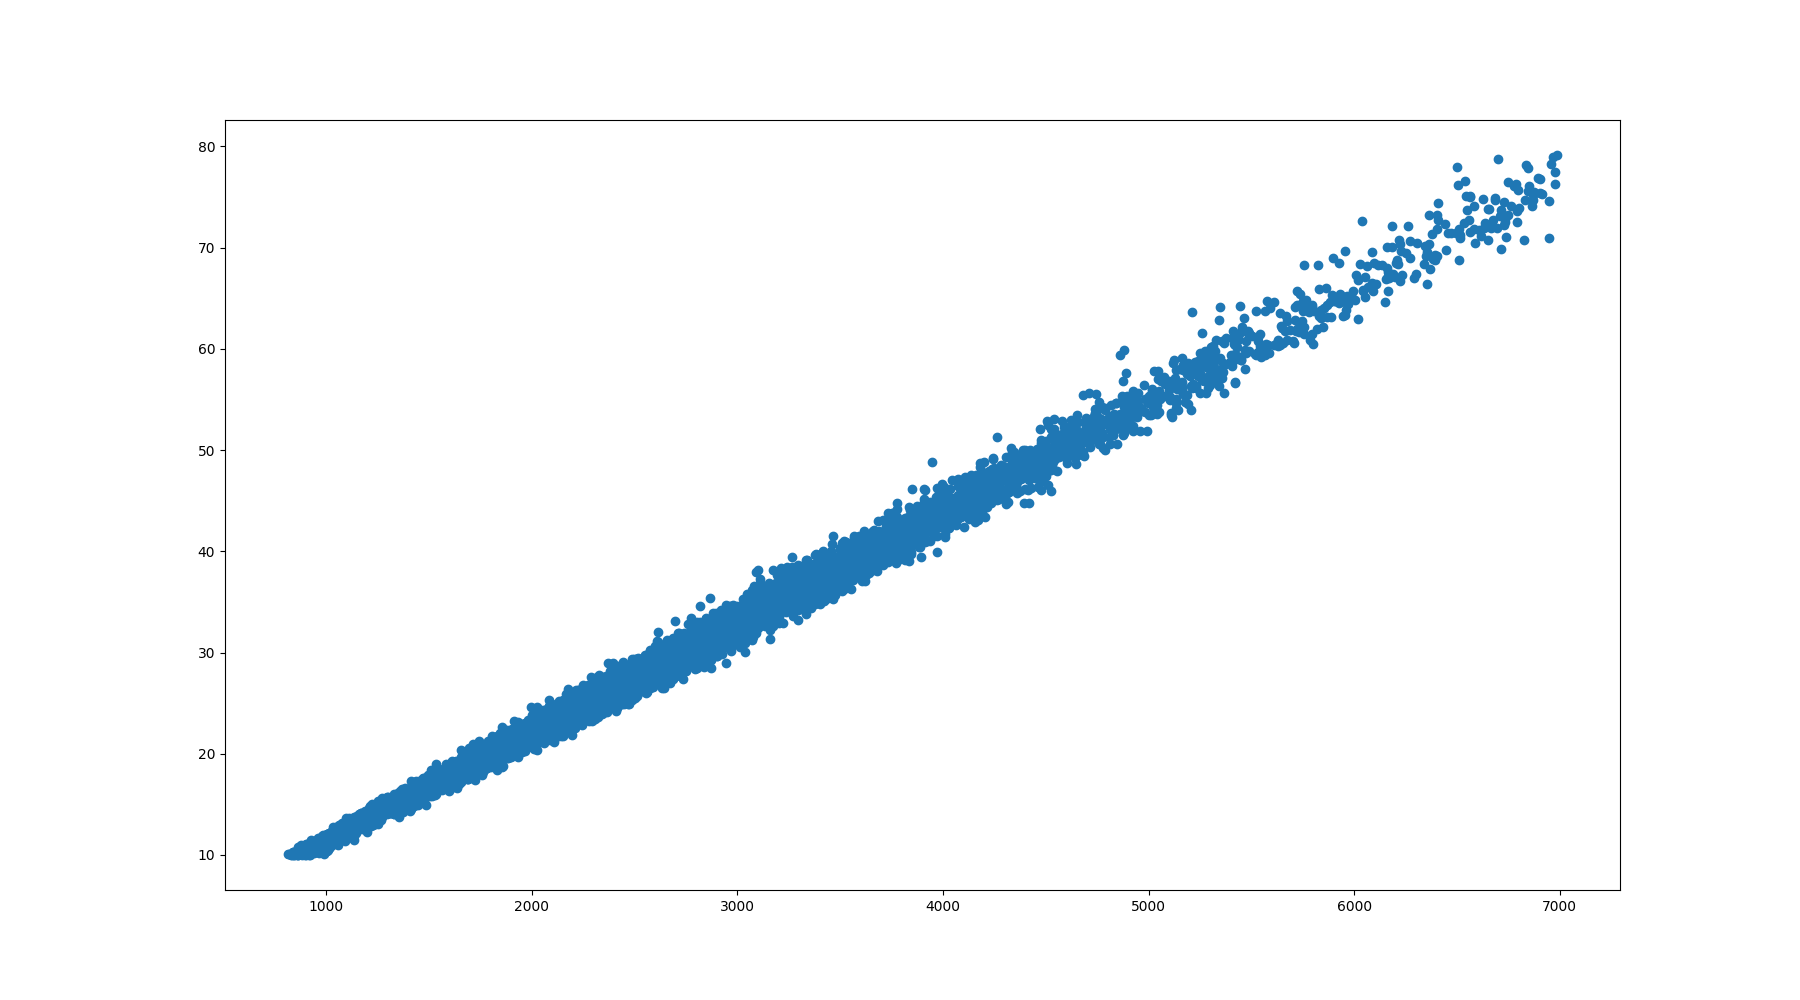

In [ ]:
fig, ax = plt.subplots(figsize = (18,10))

ax.scatter(readfile["Generation"], readfile["Area"])

plt.show()

In [ ]:
rfc = RandomForestClassifier(n_estimators=50, max_features="sqrt", max_samples=None)

# Fit RFC and predict using the testing set
rfc.fit(train_x, train_y)
pred2 = rfc.predict(test_x)

# Performance Report of rfc
print(f"Accuracy Score of Random Forest Classifier: {accuracy_score(pred2,test_y)*100}%")
cm = confusion_matrix(test_y, pred2, labels = rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
# rfc_disp = RocCurveDisplay.from_estimator(rfc, test_x, test_y, ax=ax1)
# prec, recall, _ = precision_recall_curve(test_y, pred2, pos_label=rfc.classes_[1])
# pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)

print(classification_report(test_y, pred2, target_names=["suitable", "well suitable", "excellent suitable"]))


ValueError: Unknown label type: 'continuous'

In [ ]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, degree=3, epsilon=20))
regr.fit(train_x, train_y)
pred3 = regr.predict(test_x)
print(regr.score(train_x,train_y))


KeyboardInterrupt: 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

logmodel = LinearRegression()

pipe = make_pipeline(StandardScaler(), logmodel)
pipe.fit(train_x,train_y)  # apply the pipeline on training data
print(pipe.score(test_x,test_y))



NameError: name 'train_x' is not defined

In [10]:
x_surf, y_surf = np.meshgrid(np.linspace(readfile.Insolation.min(), readfile.Insolation.max(), 10), np.linspace(readfile.Area.min(), readfile.Area.max(), 10))
onlyX = pd.DataFrame({'Insolation':x_surf.ravel(), 'Area':y_surf.ravel()})
fittedY=pipe.predict(onlyX)
fittedY=np.array(fittedY)

print(f"Insolation max:{readfile.Insolation.max()}/min:{readfile.Insolation.min()}")
print(f"Area max:{readfile.Area.max()}/min:{readfile.Area.min()}")
print(f"Generation max:{readfile.Generation.max()}/min:{readfile.Generation.min()}")

# readfile["Generation"].plot.line()

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(20,10))
### Set figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_x['Insolation'],test_x['Area'],test_y,c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('Insolation')
ax.set_ylabel('Area')
ax.set_zlabel('Generation')
plt.show()

NameError: name 'readfile' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

logmodel = LinearRegression()

pipe = make_pipeline(StandardScaler(), logmodel)
pipe.fit(X_corr_train,y_corr_train)  # apply the pipeline on training data
print(pipe.score(X_corr_test,y_corr_test))

0.006359298643942579


In [ ]:
x_surf, y_surf = np.meshgrid(np.linspace(X_corr.0.min(), X_corr.0.max(), 10), np.linspace(X_corr.1.min(), X_corr.1.max(), 10))
onlyX = pd.DataFrame({'Insolation':x_surf.ravel(), 'Area':y_surf.ravel()})
fittedY=pipe.predict(onlyX)
fittedY=np.array(fittedY)

# print(f"Insolation max:{readfile.Insolation.max()}/min:{readfile.Insolation.min()}")
# print(f"Area max:{readfile.Area.max()}/min:{readfile.Area.min()}")
# print(f"Generation max:{readfile.Generation.max()}/min:{readfile.Generation.min()}")

# readfile["Generation"].plot.line()

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(20,10))
### Set figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_corr_test[0],X_corr_test[1],y_corr_test,c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Generation/m2')
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3901622353.py, line 1)